In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'A': range(1, 11), 'B': np.random.random(10)})
# print(df.A)
pd.qcut(df.A,6, labels=False)

0    0
1    0
2    1
3    1
4    2
5    3
6    3
7    4
8    5
9    5
Name: A, dtype: int64

In [3]:
# pd.qcut?

In [4]:
df = pd.DataFrame(np.random.randn(10, 4),columns=list('ABCD'))
df

,A,B,C,D
0,-0.760976,-0.078619,-0.282360,0.881651
1,0.924152,-1.065242,1.405685,-1.737516
2,-1.485474,0.024331,1.145769,1.588494
3,1.772181,0.172353,-0.844138,1.129113
4,-1.118117,0.789897,-0.481051,-0.550894
5,0.168459,-1.320824,-0.465120,-0.953277
6,-0.166265,0.375582,2.012890,0.377757
7,-1.297685,1.369090,1.418776,0.951825
8,1.217827,0.784953,-0.438067,-0.586741
9,-0.296858,-1.248383,0.068886,-0.901393


In [5]:
df.B.describe()

count    10.000000
mean     -0.019686
std       0.926519
min      -1.320824
25%      -0.818586
50%       0.098342
75%       0.682610
max       1.369090
Name: B, dtype: float64

In [6]:
df.C.sort_values(ascending = False).tail(3)

5   -0.465120
4   -0.481051
3   -0.844138
Name: C, dtype: float64

In [7]:
#describe()方法返回：count,mean,std,min,max,25%,50%,75%

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
A    10 non-null float64
B    10 non-null float64
C    10 non-null float64
D    10 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [9]:
df = pd.DataFrame({'A':['1','2','3','4']})

In [10]:
df.A.apply(lambda x:int(x)).sum()

10

In [11]:
# pd.DataFrame({'A':[1],'B':[8]})

# pd.reindex pd.rename

In [12]:
df = pd.DataFrame({'A':['1','2','3','4']})

In [13]:
df

,A
0,1
1,2
2,3
3,4


In [14]:
df.reindex(['a','b','c','d',1,2])

,A
a,NaN
b,NaN
c,NaN
d,NaN
1,2
2,3


In [15]:
index = ['Firefox','Chrome','Safari','IE10','Konqueror']
df = pd.DataFrame({'http_status':[200,200,404,404,301],
                  'response_time':[0.04,0.02,0.07,0.08,1.0],
                  },index = index)

In [16]:
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [17]:
new_index = ['Safari','Iceweasel','Comodo Dragon','IE10','Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [18]:
df.reindex(new_index,fill_value = 0)

,http_status,response_time
Safari,404,0.07
Iceweasel,0,0.00
Comodo Dragon,0,0.00
IE10,404,0.08
Chrome,200,0.02


In [19]:
df.reindex(new_index,fill_value = 'missing')

,http_status,response_time
Safari,404,0.07
Iceweasel,missing,missing
Comodo Dragon,missing,missing
IE10,404,0.08
Chrome,200,0.02


In [20]:
df.reindex(columns = ['http_status','user_agent'])

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [21]:
df.reindex(['http_status','user_agent'],axis='columns')

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [22]:
df = pd.DataFrame({'A':[1,2,3],'B':[4,5,6]})
df.rename(index = str,columns = {'A':'a','B':'c'})

,a,c
0,1,4
1,2,5
2,3,6


In [23]:
df.rename(index = str,columns = {'A':'a','C':'c'})

,a,B
0,1,4
1,2,5
2,3,6


In [24]:
df.index.dtype

dtype('int64')

In [25]:
df.rename(str.lower,axis=  'columns')

,a,b
0,1,4
1,2,5
2,3,6


In [26]:
df.rename({1:2,2:4},axis=  'index')

,A,B
0,1,4
2,2,5
4,3,6


In [27]:
data = pd.DataFrame({'订单号':[1,1,2,2,3,4,5],'数量':[1,3,4,5,3,2,5],'商品名称':['汉堡','可乐','热狗','汉堡','冰淇淋','掉渣饼','全家桶'],'单价':['￥5','￥2','￥3','￥5','￥3','￥7','￥10']})

In [28]:
data.单价 = data.单价.apply(lambda x:int(x[1:]))

In [29]:
data

,订单号,数量,商品名称,单价
0,1,1,汉堡,5
1,1,3,可乐,2
2,2,4,热狗,3
3,2,5,汉堡,5
4,3,3,冰淇淋,3
5,4,2,掉渣饼,7
6,5,5,全家桶,10


In [30]:
num1 = data.groupby('商品名称').数量.sum().sort_values(ascending = False).head(1)

In [31]:
list(num1.index)

['汉堡']

In [32]:
num1.index[0]

'汉堡'

In [33]:
data[data.商品名称.isin(list(num1.index))]['单价'][0]

5

In [34]:
a = data.groupby('商品名称')
data[data.商品名称.isin([a.sum().sort_values('数量',ascending = False).head(1).index[0]])].单价

0    5
3    5
Name: 单价, dtype: int64

In [35]:
s = data.groupby('订单号').apply(lambda x:x.单价*x.数量).sum(level=0).sort_values(ascending = False)

In [36]:
s

订单号
5    50
2    37
4    14
1    11
3     9
dtype: int64

In [37]:
# s.sum(level=0).sort_values(ascending = False).head(1)

In [38]:
data['总价'] = data.数量 * data.单价
a = data.groupby('订单号').sum().总价
a.sort_values(ascending = False).head(1)

订单号
5    50
Name: 总价, dtype: int64

In [39]:
data.数量.sum()

23

In [40]:
data.商品名称.nunique()

6

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
订单号     7 non-null int64
数量      7 non-null int64
商品名称    7 non-null object
单价      7 non-null int64
总价      7 non-null int64
dtypes: int64(4), object(1)
memory usage: 360.0+ bytes


In [42]:
df = pd.DataFrame({"A":np.arange(1,5),
"B":np.arange(1,5),
"C":np.arange(1,5),
"D":np.arange(1,5),
"E":np.arange(1,5),})

In [43]:
df[['A','C','E']]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [44]:
df.loc[:,['A','C','E']]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [45]:
df.iloc[:,[0,2,4]]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [46]:
df.iloc[:,::2]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [47]:
df.loc[:,::2]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [48]:
df = pd.DataFrame({"A":np.arange(1,5),
"B":[4,1,6,8],
"C":np.arange(5,9),
"D":np.arange(8,12),
"E":[10,5,3,9]})

In [49]:
df

,A,B,C,D,E
0,1,4,5,8,10
1,2,1,6,9,5
2,3,6,7,10,3
3,4,8,8,11,9


In [50]:
# df.sort_index(axis=1,ascending = True)

In [51]:
df.sort_values('B').sort_values('E')

,A,B,C,D,E
2,3,6,7,10,3
1,2,1,6,9,5
3,4,8,8,11,9
0,1,4,5,8,10


In [52]:
df.sort_values(['B','E'])

,A,B,C,D,E
1,2,1,6,9,5
0,1,4,5,8,10
2,3,6,7,10,3
3,4,8,8,11,9


In [53]:
d1 = {'b':[1,2,3],'a':[3,4,6]}
pd.DataFrame(d1,columns = d1.keys())

,b,a
0,1,3
1,2,4
2,3,6


In [54]:
df = pd.DataFrame({"A":np.arange(1,5),
"B":np.arange(2,6),
"C":np.arange(5,9),
"D":np.arange(1,5),
"E":np.arange(6,10)})

In [55]:
df.A.apply(lambda x:x if x !=5 else 0)

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [56]:
df.A.agg(lambda x:0 if x==5 else x)

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [57]:
df[df.columns[:-3]]

,A,B
0,1,2
1,2,3
2,3,4
3,4,5


In [58]:
df.iloc[:,:-3]

,A,B
0,1,2
1,2,3
2,3,4
3,4,5


In [59]:
df.loc[:,list('AB')]

,A,B
0,1,2
1,2,3
2,3,4
3,4,5


In [60]:
df.loc[:,('C','D','E')]

,C,D,E
0,5,1,6
1,6,2,7
2,7,3,8
3,8,4,9


In [61]:
df = pd.DataFrame(np.arange(10,20).reshape(5,2))

In [62]:
df

,0,1
0,10,11
1,12,13
2,14,15
3,16,17
4,18,19


In [63]:
df[(df>15)|(df<13)].fillna(np.nan)

,0,1
0,10.0,11.0
1,12.0,NaN
2,NaN,NaN
3,16.0,17.0
4,18.0,19.0


In [64]:
df = pd.DataFrame({'one':np.random.randint(10,20,5),
                  'two':'too',
                  'three':np.arange(15,20)})

In [65]:
df[df.one>15]

,one,two,three
0,18,too,15


In [66]:
df = pd.DataFrame({ 'A' : 1.,
                      'C':pd.Series(1,index=list(range(1,5)),dtype='float32'),
                     'D' : np.array([3] *4,dtype='int32'),
                     'E':pd.Categorical(["test","train","test","train"]),
                   'F' : 'foo' })

In [67]:
df.loc[3]

A       1
C       1
D       3
E    test
F     foo
Name: 3, dtype: object

In [68]:
df.iloc[:,1]

1    1.0
2    1.0
3    1.0
4    1.0
Name: C, dtype: float32

In [69]:
df = pd.DataFrame({'A':2.,
                 'B':5.,
                 'C':pd.Series(np.arange(0,5),index = list('abcde')),
                  'D':'too'})

In [70]:
df

,A,B,C,D
a,2.0,5.0,0,too
b,2.0,5.0,1,too
c,2.0,5.0,2,too
d,2.0,5.0,3,too
e,2.0,5.0,4,too


In [71]:
df.loc[['a','c','e'],['A','C','D']]

,A,C,D
a,2.0,0,too
c,2.0,2,too
e,2.0,4,too


In [72]:
df.iloc[[0,2,4],[0,2,3]]

,A,C,D
a,2.0,0,too
c,2.0,2,too
e,2.0,4,too


In [73]:
df = pd.DataFrame({'A':[3,2,5,2,1,6,3,4,5],'B':[4,6,3,7,2,9,2,7,7]})

In [74]:
df.A.unique()

array([3, 2, 5, 1, 6, 4], dtype=int64)

In [75]:
df.B.nunique()

6

In [76]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
...                   columns=['A', 'B', 'C', 'D'])

In [77]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [78]:
df.drop(['B','C'],axis=1,inplace = False)

,A,D
0,0,3
1,4,7
2,8,11


In [79]:
df.drop(['B','C'],axis=1,inplace = True)

In [80]:
df

,A,D
0,0,3
1,4,7
2,8,11


In [81]:
df.drop(columns=['B', 'C'],inplace = True)

KeyError: "['B' 'C'] not found in axis"

In [ ]:
df

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns=['A', 'B', 'C', 'D'],index = list('abc'))

In [ ]:
df.drop(index = 'b',columns = 'B',inplace = False)

In [ ]:
df.drop(index = 'b',columns = 'B',inplace = True)

In [ ]:
df

In [ ]:
df = pd.DataFrame({'A':[3,2,5,2,1,6,3,4,5],'B':[4,6,3,7,2,9,2,7,7]})

In [ ]:
df[df>5].fillna(0)

In [ ]:
df[~(df<5)].fillna(0)

In [ ]:
df = pd.DataFrame({
...     'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
...     'col2' : [2, 1, 9, 8, 7, 4],
...     'col3': [0, 1, 9, 4, 2, 3],
... })

In [ ]:
df.sort_values(by=['col1', 'col2'])

In [ ]:
df.sort_values('col1').sort_values('col2')

In [ ]:
df.sort_values(['col1','col2'])

In [ ]:
df = pd.DataFrame({'A':[1,2,3,4,4,6],'B':[3,4,5,5,5,8],'C':['lama', 'cow', 'lama', 'beetle', 'lama', 'hippo']})

In [ ]:
# df.drop_duplicates(['A','B'])
df.drop_duplicates(['B','C'])
# df

In [ ]:
df.drop_duplicates(['B','C'])

In [ ]:
a={'name':['张三','李四','王五'],
'class':['A1','A2','A3'],
'age':[15,15,15]}
df=pd.DataFrame(a)

In [ ]:
for x ,y in df.groupby('name'):
    print(x)

In [ ]:
df = pd.DataFrame({'A':[3,4,5,6],'B':['a','b','c','d'],'C':[11,33,99,33]})

In [ ]:
df.groupby(['C'])['C'].count()

In [ ]:
df.groupby(['C']).size()

In [ ]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                   'B':['one','one','two','three','two','two','one','three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})

In [ ]:
df.groupby('B').C.max().sort_values()

In [ ]:
timerange = pd.date_range('2019-1-1','2019-2-1',freq = '12H')

In [ ]:
timerange

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3], 'day': [4, 5]})

In [ ]:
df

In [ ]:
pd.to_datetime(df)

In [ ]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
...                    'year': [2012, 2014, 2013, 2014],
...                    'sale':[55, 40, 84, 31]})

In [ ]:
df

In [ ]:
df.set_index('month')

In [ ]:
df.set_index(['year','month'])

In [ ]:
df.set_index([[1,2,3,4],'year'])

In [ ]:
df=pd.DataFrame({'Year':['1960','1961','1962','1963','1964'],
'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],
'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42],
'Murder':[9,8,8,8,9],'Forcible_Rape':[17,17,17,17,21],
'Robbery':[10,10,11,11,13]})

In [ ]:
df.Year = pd.to_datetime(df.Year,format = '%Y')

In [ ]:
df

In [ ]:
df.Year = pd.to_datetime(df.Year,format = '%Y')

In [ ]:
df

In [ ]:
df=pd.DataFrame({'Population':[179,182,185,188,191],
                 'Total':[33,34,37,41,45],
                 'Violent':[28,28,30,31,36],
                 'Property':[30,31,34,37,42]},
                index = pd.date_range('1960',periods=5,freq='AS'))

In [ ]:
pd.date_range('1960',periods = 5,freq = 'AS')

In [ ]:
df.index

In [ ]:
df.index.name = 'Year'

In [ ]:
df

In [ ]:
df=pd.DataFrame({'Year':['1960','1961','1962','1963','1964'],
                 'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],
                 'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42]})

In [ ]:
df.set_index('Year',drop = True)

# 关于set_index

In [ ]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
...                    'year': [2012, 2014, 2013, 2014],
...                    'sale':[55, 40, 84, 31]})

In [ ]:
df.set_index('year')

In [ ]:
df.set_index('month')

In [ ]:
df.set_index(['year','month'])

In [ ]:
df2 = df.set_index([[1,2,3,4],'year'])

In [ ]:
df2.index

In [ ]:
df=pd.DataFrame({'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42]},index = pd.date_range('1960',periods=5,freq='AS'))

In [ ]:
df

In [ ]:
df.resample('10AS').sum()

In [ ]:
df=pd.DataFrame({'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42]},index = pd.date_range('1960',periods=5,freq='AS'))

In [ ]:
df

In [ ]:
df.resample('10AS').max()['Population']

In [ ]:
df['Population'].resample('10AS').max()

In [ ]:
timerange = pd.date_range('2019-1-1','2019-2-1',freq = '12H')

In [ ]:
timerange

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3], 'day': [4, 5]})

In [ ]:
df

In [ ]:
pd.to_datetime(df)

In [ ]:
df.set_index(['year','month'])

In [ ]:
df=pd.DataFrame({'age':[17,15,14,18,17],'Medu':[4,3,2,5,4],'sex':['F','F','M','M','F']})

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df.applymap(lambda x:x+2 if type(x) is int else x)

In [ ]:
df.apply(lambda x:x+2 if type(x) is int else x,axis=1)

In [ ]:
df

In [ ]:
# df[['age','Medu']]+2

# 关于resample

In [ ]:
index = pd.date_range('1/1/2000', periods=9, freq='t')

In [ ]:
index

In [ ]:
series = pd.Series(range(9), index=index)

In [ ]:
series

In [ ]:
series.resample('3T').sum()

In [ ]:
series.resample('3T',label = 'right').sum()

In [ ]:
series.resample('3T',label = 'right',closed = 'right').sum()

In [ ]:
series.resample('30S').asfreq()[0:5]

In [ ]:
series.resample('30S').pad()[0:5]

In [ ]:
series.resample('30S').bfill()[0:5]

In [ ]:
def custom_resampler(array_like):
    return np.sum(array_like)+5

In [ ]:
series.resample('3T').apply(custom_resampler)

In [ ]:
s = pd.Series([1, 2], index=pd.period_range('2012-01-01',
                                                freq='A',
                                                periods=2))

In [ ]:
s

In [ ]:
pd.date_range('2019-1-1',periods = 8)

In [ ]:
s.resample('M',convention = 'start').asfreq().head()

In [ ]:
s.resample('M',convention = 'end').asfreq().head()

In [ ]:
df = pd.DataFrame(data=9*[range(4)], columns=['a', 'b', 'c', 'd'])

In [ ]:
df

In [ ]:
df['time'] = pd.date_range('1/1/2000', periods=9, freq='T')

In [ ]:
df

In [ ]:
df.resample('3T', on='time').sum()

In [ ]:
time = pd.date_range('1/1/2000', periods=5, freq='T')

In [ ]:
time

In [ ]:
df2 = pd.DataFrame(data=10*[range(4)],
                   columns=['a', 'b', 'c', 'd'],
                   index=pd.MultiIndex.from_product([time, [1, 2]]))

In [ ]:
df2

In [ ]:
df2.resample('3T', level=0).sum()

In [ ]:
df=pd.DataFrame({'school':['GP','GP','GP','GP'],'sex':['F','F','M','F'],
'age':[18,17,15,16],'guardian':['mother','father','father','mother']}) 

In [ ]:
df

In [ ]:
df.guardian.apply(lambda x:x.upper())

In [ ]:
df=pd.DataFrame({'school':['GP','GP','GP','GP'],'sex':['F','F','M','F'],
'age':['18','17','15','16'],'guardian':['mother','father','father','mother']})

In [ ]:
df['legal_drinker'] = df['age'].apply(lambda x:True if int(x) >=17 else False)

In [ ]:
df

In [3]:
import pandas as pd
df=pd.DataFrame({'age':[17,15,14,18,17],'Medu':[4,3,2,5,4],'sex':['F','F','M','M','F']})

In [4]:
df.applymap(lambda x:x+2 if type(x) == int else x)

,age,Medu,sex
0,19,6,F
1,17,5,F
2,16,4,M
3,20,7,M
4,19,6,F


In [5]:
df=pd.DataFrame({'school':['GP','GP'],'age':[17,15],'sex':['F','F'],'guardian':['mother','father'],'reason':['other','home']})

In [6]:
df

,school,age,sex,guardian,reason
0,GP,17,F,mother,other
1,GP,15,F,father,home


In [7]:
df.loc[:,'age':'guardian']

,age,sex,guardian
0,17,F,mother
1,15,F,father


In [8]:
df=pd.DataFrame({'school':['GP','GP','GP','GP'],
                 'sex':['F','F','M','F'],
                 'age':['18','17','15','16'],
                 'guardian':['mother','father','father','mother']})

In [9]:
df.guardian = df.guardian.apply(lambda x:x.capitalize() if x == 'mother' else x)

In [12]:
df
import numpy as np
df

,school,sex,age,guardian
0,GP,F,18,Mother
1,GP,F,17,father
2,GP,M,15,father
3,GP,F,16,Mother


In [13]:
cars = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8],'c':[np.nan]*4})

In [14]:
s = pd.Series(range(11),index = pd.date_range('2017-01-01',periods = 11,freq = 'S'),)

In [15]:
pd.date_range('2019-01-01','2019-02-01',freq= 'D')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [16]:
s

2017-01-01 00:00:00     0
2017-01-01 00:00:01     1
2017-01-01 00:00:02     2
2017-01-01 00:00:03     3
2017-01-01 00:00:04     4
2017-01-01 00:00:05     5
2017-01-01 00:00:06     6
2017-01-01 00:00:07     7
2017-01-01 00:00:08     8
2017-01-01 00:00:09     9
2017-01-01 00:00:10    10
Freq: S, dtype: int64

In [17]:
s.resample('5S',label = 'right',closed = 'right').sum()

2017-01-01 00:00:00     0
2017-01-01 00:00:05    15
2017-01-01 00:00:10    40
Freq: 5S, dtype: int64

In [18]:
s.resample('5S',label = 'left',closed = 'left').sum()

2017-01-01 00:00:00    10
2017-01-01 00:00:05    35
2017-01-01 00:00:10    10
Freq: 5S, dtype: int64

In [19]:
s.resample('5S').sum()

2017-01-01 00:00:00    10
2017-01-01 00:00:05    35
2017-01-01 00:00:10    10
Freq: 5S, dtype: int64

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(s.index,s.values)

In [ ]:
df = pd.DataFrame({'age':[15,22,31,65,12],
                  'name':['Emma','Hannah','Grace','Emily','Sophia'],
                  'Gender':['F','M','F','M','F'],
                  'Count':[62,65,78,100,50]})

In [ ]:
names = df.groupby('name').sum()

In [ ]:
names.Count.std()

In [ ]:
names.describe()

In [ ]:
df

In [ ]:
names.Count.idxmax()

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df['ff'] = np.nan*len(df)

In [ ]:
df

In [ ]:
df.notnull().sum()

In [ ]:
data = [['2018-10-01',10,20,12],['2018-10-02',20,20,15]]
df = pd.DataFrame(data,columns = ['Yr_Mo_Dy','RPT','VAL','ROS'])

In [ ]:
df

In [ ]:
df.set_index('Yr_Mo_Dy')

In [ ]:
df.index = ['a','b']

In [ ]:
df

In [ ]:
df.reset_index()

In [ ]:
df.reset_index?

In [ ]:
df = pd.DataFrame([('bird',    389.0),
...                    ('bird',     24.0),
...                    ('mammal',   80.5),
...                    ('mammal', np.nan)],
...                   index=['falcon', 'parrot', 'lion', 'monkey'],
...                   columns=('class', 'max_speed'))

In [ ]:
df

In [ ]:
df.reset_index()

In [ ]:
df

In [ ]:
df.set_index('class')

In [ ]:
df

In [ ]:
df.reset_index(drop = True)

In [ ]:
df.reset_index?

In [ ]:
index = pd.MultiIndex.from_tuples([('bird', 'falcon'),
...                                    ('bird', 'parrot'),
...                                    ('mammal', 'lion'),
...                                    ('mammal', 'monkey')],
...                                   names=['class', 'name'])
columns = pd.MultiIndex.from_tuples([('speed', 'max'),
...                                      ('species', 'type')])

In [ ]:
index

In [ ]:
columns

In [ ]:
df = pd.DataFrame([(389.0, 'fly'),
...                    ( 24.0, 'fly'),
...                    ( 80.5, 'run'),
...                    (np.nan, 'jump')],
...                   index=index,
...                   columns=columns)

In [ ]:
df

In [ ]:
df.reset_index(level = 'class')

In [ ]:
df.reset_index(level = 'class',col_level = 1)

In [ ]:
df.reset_index(level = 'class',col_level = 1,col_fill = 'species')

In [ ]:
df2 = df.reset_index(level = 'class',col_level = 1,col_fill = 'genus')

In [ ]:
df

In [ ]:
df.set_index?

In [ ]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
...                    'year': [2012, 2014, 2013, 2014],
...                    'sale':[55, 40, 84, 31]})

In [ ]:
df

In [ ]:
df.set_index('month')

In [ ]:
df3 = df.set_index(['year','month'])

In [ ]:
df3

In [ ]:
s3 = df3['sale']

In [ ]:
s3

In [ ]:
df4 = df.set_index([list(range(len(df))),'year'])

In [ ]:
df4

In [ ]:
df4.index.names[1]

In [ ]:
df.reindex?

In [ ]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']

In [ ]:
df = pd.DataFrame({
...      'http_status': [200,200,404,404,301],
...      'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
...       index=index)

In [ ]:
df

In [ ]:
new_index= ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10',
...             'Chrome']

In [ ]:
df.reindex(new_index)

In [ ]:
df.reindex(new_index, fill_value=0)

In [ ]:
df.reindex(columns=['http_status', 'user_agent'])

In [ ]:
df

In [ ]:
df.reindex({'Firefox':[202,0.9]})

In [ ]:
df

In [ ]:
df.rename?

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [ ]:
df

In [ ]:
df.rename(index=str, columns={"A": "a", "B": "c"})

In [ ]:
df.index.dtype

In [ ]:
df.rename(str.lower,axis= 'columns')

In [ ]:
df.rename(index=str, columns={"A": "a", "C": "c"})

In [ ]:
index = pd.date_range('2019-01-01',periods = 90,freq = 'D')

In [ ]:
df = pd.DataFrame(np.random.randint(0,10,size = 90),index = index)

In [ ]:
df.resample('MS').mean()

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,8)

In [ ]:
(df.index.max()-df.index.min()).days

In [ ]:
cars = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8],'c':[np.nan]*4})

In [ ]:
cars

In [ ]:
cars.loc[:,'a':'b']

In [ ]:
del cars['c']

In [ ]:
cars

In [ ]:
df1 = pd.DataFrame({'a':['A','B','C'],'b':[1,2,3],'c':[3,4,5]})
df2 = pd.DataFrame({'a':['B','C','D'],'b':['T','F','T'],'c':[5,6,7]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1,df2,how = 'left',on = 'a')

In [ ]:
pd.concat([df1,df2])

In [ ]:
a = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8]})
b = pd.DataFrame(np.random.randint(5,10,(4,2)),columns = ['a','b'])

In [ ]:
a

In [ ]:
b

In [ ]:
pd.concat([a,b],ignore_index = True,verify_integrity = True)

In [ ]:
# help(a.append)

In [ ]:
a.append(b,ignore_index = True)

In [ ]:
a+b

In [ ]:
df1 = pd.DataFrame({'a':['A','B','C'],'b':[1,2,3]})
df2 = pd.DataFrame({'a':['B','C','D'],'b':[2,3,4]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1,df2,how = 'outer')

In [ ]:
pd.concat([df1,df2],axis=1)

In [ ]:
pd.concat([df1,df2])

In [ ]:
df1.columns = ['c','d']

In [ ]:
pd.concat([df1,df2],sort = True)

In [ ]:
df1 = pd.DataFrame({'a':[12,121]})
df2 = pd.DataFrame({'a':['D',21],'b':['C','B']})

In [ ]:
pd.concat([df1,df2],axis=0,sort=True)

In [ ]:
df1 = pd.DataFrame({'a':[12,121]})
df2 = pd.DataFrame({'a':['D',21],'b':['C','B']})

In [ ]:
pd.concat([df1,df2],axis=1)

In [ ]:
df1 = pd.DataFrame({'a':[12,121]})
df2 = pd.DataFrame({'a':['D',21]})

In [ ]:
pd.concat([df1,df2])

In [ ]:
df = pd.DataFrame({"a" : [5 ,2,],"b" :[4, 5,]})
df1 = pd.DataFrame({"a" : [4 ,2],"b" :[7, 5]})

In [ ]:
pd.concat([df,df1],axis=1)

In [ ]:
df = pd.DataFrame({"a" : [5 ,2,],"b" :[4, 5]})

In [ ]:
df.rename(columns = {'a':'aaa','b':'bbb'})

In [ ]:
df

In [ ]:
df2 = df.set_index([[0,1],'a'])

In [ ]:
df2.index

In [ ]:
import seaborn as sns
sns.distplot(df.a)

In [ ]:
sns.despine()
sns.jointplot(df.a,df.b)

In [ ]:
sss = {'Name':'张三','sex':'男','age':'21'}
df = pd.DataFrame(sss,index = list([0,1,2]))
print(df)
sssad = df.age.sort_values(ascending = False)
binsVal = np.arange(0,600,10)
print(np.random.randint(0,20,10))
plt.hist(np.random.randint(0,20,10), bins = 8)

In [ ]:
data = {'row_1': [3, 2, 1, 0], 'row_2': [2,4,5,6]}
df = pd.DataFrame(data)

In [ ]:
df.idxmax()

In [ ]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data, orient='index')

In [ ]:
df

In [ ]:
s = pd.Series(np.random.randint(0,10,size = 10))

In [ ]:
s

In [ ]:
sns.distplot(s)

In [ ]:
sns.boxplot(s)

In [ ]:
sns.jointplot(s.index,s.values)

In [ ]:
df = pd.DataFrame(np.random.randint(0,10,(5,4)),columns = list('abcd'))

In [ ]:
sns.despine()
sns.pairplot(df)

In [ ]:
s = np.random.randint(5,10,20)
print(s)
plt.hist(s, bins = 10)
plt.show()

In [ ]:
plt.hist(s,bins = 5)
plt.show()

In [ ]:
df

In [ ]:
df.shape[0]

In [ ]:
data = {'row_1': [3, 2, 1, 0], 'row_2': [2,4,5,6]}
df = pd.DataFrame(data) 

In [ ]:
df

In [ ]:
df.idxmax()

In [ ]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data, orient='index')

In [ ]:
df

In [ ]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [ ]:
df

In [ ]:
df.sort_values('price',ascending = False)

In [ ]:
df.price.sort_values(ascending = False)

In [ ]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [ ]:
df

In [ ]:
plt.bar(df.item_name,df.price)

In [ ]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [ ]:
df.groupby('name').count()

In [ ]:
df.groupby('name').size()

In [ ]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [ ]:
plt.scatter(df.name,df.num*df.price,s = df.num)

In [ ]:
plt.scatter(df.name,df.num*df.price,s = df.num,c = df.price)

In [ ]:
df

In [ ]:
df[['num']]

In [ ]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "hp": [45, 39, 44, 45],                      
            }
df = pd.DataFrame(raw_data)

In [ ]:
df

In [ ]:
df[df.hp.isin(df.nlargest(1,'hp').hp)]

In [ ]:
df[df.hp.isin([df.hp.sort_values(ascending = False)[0]])]

In [ ]:
df.nlargest(2,'hp').hp

In [ ]:
df.hp.isin(df.nlargest(1,'hp').hp)

In [ ]:
df[df.hp == df.hp.sort_values(ascending =False)[0]]

In [ ]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "pokedex": ['yes', 'no','yes','no']                        
            }
df = pd.DataFrame(raw_data)

In [ ]:
df.pokedex[df.pokedex == 'yes']='zhao'

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df = pd.DataFrame({'a': [1, 10, 8, 10, -1],
...                    'b': list('abdce'),
...                    'c': [1.0, 2.0, np.nan, 3.0, 4.0]})

In [ ]:
df

In [ ]:
df.nlargest(3,'a')

In [ ]:
df.nlargest(3,'a',keep = 'last')

In [ ]:
df.nlargest(3,['a','c'])

In [ ]:
# df.nlargest(3,'b')

In [ ]:
df.nsmallest(3,'a')

In [ ]:
pd.Series([True, False]).any()

In [ ]:
pd.Series([True,False]).all()

In [ ]:
pd.Series([False, False]).any()

In [ ]:
pd.Series([True, True]).all()

In [ ]:
df = pd.DataFrame(np.random.randint(0,20,15).reshape(3,5))

In [ ]:
df[df>7]

In [ ]:
df=pd.DataFrame(np.arange(12).reshape(3,4),columns=list('ABCD'))

In [ ]:
df

In [ ]:
df[['A','B']]

In [ ]:
df.loc[:,'A':'B']

In [ ]:
df1=pd.DataFrame(np.arange(30).reshape(5,6),columns=list('ABCDEF'))

In [ ]:
df1.iloc[:,[1,3,5]]

In [ ]:
df1=pd.DataFrame(np.arange(20).reshape(4,5),columns=['abc','bca','aaa','ddd','abd'])

In [ ]:
df1.filter(regex = 'ab[c-d]')

In [ ]:
df=pd.DataFrame(np.arange(12).reshape(3,4),columns=list('ABCD'))

In [ ]:
df

In [ ]:
df[(df.A>3)&(df.C>3)]

In [ ]:
df 

In [ ]:
df.assign(E = lambda x:x.A+x.B)

In [ ]:
df = pd.DataFrame({'a':[1,2,3],'b':[5,6,7]},columns = list('AB'))

In [ ]:
df

In [ ]:
df.drop?

In [ ]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
...                    'B': {0: 1, 1: 3, 2: 5},
...                    'C': {0: 2, 1: 4, 2: 6}})

In [ ]:
df

In [ ]:
df.melt(id_vars = ['A'],value_vars = ['B'])

In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],'bar': ['A', 'B', 'C', 'A', 'B', 'C'], 'baz': [1, 2, 3, 4, 5, 6],'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [ ]:
df

In [ ]:
df.pivot(index = 'foo',columns = 'bar',values = ['baz','zoo'])

In [ ]:
df = pd.DataFrame({"a" : [1 ,2, 3],"b" :[4, 5, 6],"c" : [7, 8, 9]},index = ['a', 'b', 'c'])
df1 = pd.DataFrame({"a" : [4 ,2, 5],"b" :[7, 5, 6],"c" : [7, 8, 3]},index = ['a', 'b', 'c'])

In [ ]:
pd.concat([df,df1],axis=1)

In [ ]:
d = pd.DataFrame([[1,2,3],[5,6,7],[3,9,0],[8,0,3]], columns=["A", "B", "C"])
d1 = pd.DataFrame([[1,2],[5,6],[3,9]], columns=["A", "D"])
d3 = pd.merge(d, d1, on="A", how="left")

In [ ]:
d3

In [85]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 4, 7]})
df.isin({'A': [1, 3], 'B': [4, 7, 12]})

,A,B
0,True,False
1,False,True
2,True,True


In [84]:
df

,A,B
0,1,1
1,2,4
2,3,7


In [91]:
df=pd.DataFrame({'b':[1,2,4,5],'a':[2,3,4,5]}) 

In [92]:
df.isin([1,2,3,4])

,b,a
0,True,True
1,True,True
2,True,True
3,False,False


In [93]:
df=pd.DataFrame({'b':[1,2,4,5],'a':[2,3,4,5]},columns=['b','a']) 

In [94]:
df.isin([1,2,3,4])

,b,a
0,True,True
1,True,True
2,True,True
3,False,False


In [95]:
s=pd.Series([1,2,3,4])

In [96]:
df=pd.DataFrame({'b':[1,2,4,5],'a':[2,3,4,5]}) 

In [97]:
df.isin(s)

,b,a
0,True,False
1,True,False
2,False,False
3,False,False


In [98]:
pd.DataFrame({'b':[1,2,4,5],'a':[2,3,4,5]})

,b,a
0,1,2
1,2,3
2,4,4
3,5,5


In [99]:
df = pd.DataFrame(
{'A': ['a', 'b', 'a', 'c', 'a', 'c', 'b', 'c'], 
 'B': [2, 8, 1, 4, 3, 2, 5, 9], 
 'C': [102, 98, 107, 104, 115, 87, 92, 123]})

In [100]:
df.groupby('A').max()

,B,C
A,,
a,3,115
b,8,98
c,9,123


In [101]:
abc = pd.DataFrame(np.random.rand(2,3))

In [102]:
abc[3] = np.nan

In [103]:
abc

,0,1,2,3
0,0.246387,0.417940,0.397921,NaN
1,0.353399,0.928054,0.432114,NaN


In [104]:
abc.size

8

In [105]:
abc.count()

0    2
1    2
2    2
3    0
dtype: int64

In [106]:
df = pd.DataFrame(
{'A': ['a', 'b', 'a', 'c', 'a', 'c', 'b', 'c'], 
 'B': [2, 8, 1, 4, 3, 2, 5, 9], 
 'C': [102, 98, 107, 104, 115, 87, 92, 123]})

In [107]:
df.groupby('A').mean()

,B,C
A,,
a,2.0,108.000000
b,6.5,95.000000
c,5.0,104.666667


In [108]:
df.describe()

,B,C
count,8.000000,8.000000
mean,4.250000,103.500000
std,2.915476,11.722993
min,1.000000,87.000000
25%,2.000000,96.500000
50%,3.500000,103.000000
75%,5.750000,109.000000
max,9.000000,123.000000


In [109]:
df

,A,B,C
0,a,2,102
1,b,8,98
2,a,1,107
3,c,4,104
4,a,3,115
5,c,2,87
6,b,5,92
7,c,9,123


In [110]:
df1 = pd.DataFrame(
{'A': ['a', 'b', 'a', 'c', 'a', 'c', 'b', 'c'], 
 'B': [2, 8, 1, 4, 3, 2, 5, 9], 
 'C': [102, 98, 107, 104, 115, 87, 92, 123]})

In [111]:
df[~df.A.isin(df1.A)]

,A,B,C


In [112]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],'data1' : np.random.randn(5),'data2' : np.random.randn(5)})

In [113]:
grouped = df['data1'].groupby(df['key1'])

In [115]:
grouped

In [114]:
grouped.mean()

key1
a   -0.191418
b    1.007307
Name: data1, dtype: float64

In [118]:
df

,key1,key2,data1,data2
0,a,one,-0.274922,-0.727038
1,a,two,-1.366302,-2.722926
2,b,one,2.062906,-0.423621
3,b,two,-0.048292,1.747342
4,a,one,1.066971,-1.953783


In [117]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [119]:
df = pd.DataFrame({'A':[1,1,2,2],                    'B':[1,2,3,4],                   'C':np.random.randn(4)})

In [120]:
df.groupby('A').size()

A
1    2
2    2
dtype: int64

In [121]:
df = pd.DataFrame( {"a" : [4 ,np.NAN, np.NAN], "b" : [7, np.NAN, 9], "c" : [10, 11, 12]}, index = [1, 2, 3])

In [123]:
df

,a,b,c
1,4.0,7.0,10
2,NaN,NaN,11
3,NaN,9.0,12


In [125]:
df.count(axis=1)

1    3
2    1
3    2
dtype: int64

In [126]:
df = pd.DataFrame( {"a" : [4 ,np.NAN, np.NAN], "b" : [7, np.NAN, 9], "c" : [10, 11, 12]}, index = [1, 2, 3])

In [127]:
df

,a,b,c
1,4.0,7.0,10
2,NaN,NaN,11
3,NaN,9.0,12


In [131]:
df.sum()

a     4.0
b    16.0
c    33.0
dtype: float64

In [132]:
df = pd.DataFrame({'A': range(1, 11), 'B': np.random.randn(10)})

In [133]:
df

,A,B
0,1,-0.522267
1,2,0.604921
2,3,-1.245710
3,4,-0.273938
4,5,0.889272
5,6,-0.188710
6,7,-0.328789
7,8,-2.598203
8,9,0.741417
9,10,1.550883


In [138]:
pd.qcut(df.A,5,labels = False)

0    0
1    0
2    1
3    1
4    2
5    2
6    3
7    3
8    4
9    4
Name: A, dtype: int64

In [139]:
ddff = pd.DataFrame({'A':range(1,11),'B':np.random.randn(10)})

In [140]:
ddff

,A,B
0,1,-0.961985
1,2,-2.217227
2,3,-0.060899
3,4,1.510371
4,5,-0.298515
5,6,-1.054055
6,7,0.287926
7,8,-0.405710
8,9,0.978982
9,10,-0.902875


In [141]:
ddff.assign(ln_A = lambda x:x.A**2)

,A,B,ln_A
0,1,-0.961985,1
1,2,-2.217227,4
2,3,-0.060899,9
3,4,1.510371,16
4,5,-0.298515,25
5,6,-1.054055,36
6,7,0.287926,49
7,8,-0.405710,64
8,9,0.978982,81
9,10,-0.902875,100


In [142]:
newcol = ddff.A/2

In [143]:
newcol

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
6    3.5
7    4.0
8    4.5
9    5.0
Name: A, dtype: float64

In [145]:
ddff.assign(lnn_A = newcol,ln_A = lambda x:x.B**2)

,A,B,lnn_A,ln_A
0,1,-0.961985,0.5,0.925416
1,2,-2.217227,1.0,4.916094
2,3,-0.060899,1.5,0.003709
3,4,1.510371,2.0,2.281222
4,5,-0.298515,2.5,0.089111
5,6,-1.054055,3.0,1.111031
6,7,0.287926,3.5,0.082901
7,8,-0.405710,4.0,0.164601
8,9,0.978982,4.5,0.958406
9,10,-0.902875,5.0,0.815184


In [146]:
ddff.assign(E = ddff.A,F = lambda x:x.A + x.B)

,A,B,E,F
0,1,-0.961985,1,0.038015
1,2,-2.217227,2,-0.217227
2,3,-0.060899,3,2.939101
3,4,1.510371,4,5.510371
4,5,-0.298515,5,4.701485
5,6,-1.054055,6,4.945945
6,7,0.287926,7,7.287926
7,8,-0.405710,8,7.594290
8,9,0.978982,9,9.978982
9,10,-0.902875,10,9.097125


In [147]:
df = pd.DataFrame(np.random.randint(0,20,40).reshape(8,5),columns=list('ABCDE'))

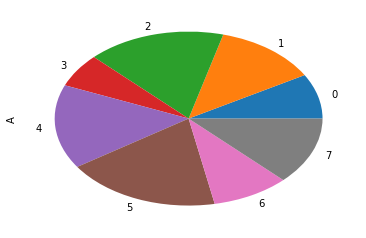

In [148]:
df.A.plot(kind = 'pie')

In [149]:
adf = pd.DataFrame({'x1':list("ABC"),'x2':[1,2,3]})
bdf = pd.DataFrame({'x1':list('ABD'),'x2':list('TFT')})

In [150]:
pd.merge(adf,bdf,how = 'left',on = 'x1')

,x1,x2_x,x2_y
0,A,1,T
1,B,2,F
2,C,3,NaN


In [151]:
pd.merge(adf,bdf,how = 'right',on = 'x1')

,x1,x2_x,x2_y
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [152]:
pd.merge(adf,bdf,how = 'inner',on = 'x1')

,x1,x2_x,x2_y
0,A,1,T
1,B,2,F


In [153]:
pd.merge(adf,bdf,how = 'outer',on='x1')

,x1,x2_x,x2_y
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [154]:
df

,A,B,C,D,E
0,8,1,11,15,8
1,12,5,11,13,13
2,16,7,6,15,16
3,6,3,16,10,3
4,15,12,2,16,2
5,18,16,12,10,13
6,9,14,17,19,11
7,12,15,9,19,9


In [155]:
df.clip(3,9)

,A,B,C,D,E
0,8,3,9,9,8
1,9,5,9,9,9
2,9,7,6,9,9
3,6,3,9,9,3
4,9,9,3,9,3
5,9,9,9,9,9
6,9,9,9,9,9
7,9,9,9,9,9


In [156]:
d = pd.DataFrame([[1,2,3],[5,6,7],[3,9,0],[8,0,3]], columns=["A", "B", "C"])
d1 = pd.DataFrame([[1,2],[5,6],[3,9]], columns=["A", "D"])
d3 = pd.merge(d, d1, on="A", how="left")

In [158]:
d

,A,B,C
0,1,2,3
1,5,6,7
2,3,9,0
3,8,0,3


In [159]:
d1

,A,D
0,1,2
1,5,6
2,3,9


In [160]:
d3 = pd.merge(d, d1, on="A", how="left")
d3

,A,B,C,D
0,1,2,3,2.0
1,5,6,7,6.0
2,3,9,0,9.0
3,8,0,3,NaN


In [161]:
pd.qcut(range(5),4)

[(-0.001, 1.0], (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0]]
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

In [162]:
pd.qcut(range(5),3,labels = ['good','medium','bad'])

[good, good, medium, bad, bad]
Categories (3, object): [good < medium < bad]

In [163]:
pd.qcut(range(5),4,labels = False)

array([0, 0, 1, 2, 3], dtype=int64)

In [164]:
data = {'col_0':[9,-3,0,-1,5],'col_1':[-2,-7,6,8,-5]}
df = pd.DataFrame(data)

In [165]:
df

,col_0,col_1
0,9,-2
1,-3,-7
2,0,6
3,-1,8
4,5,-5


In [166]:
df.clip(-4,6)

,col_0,col_1
0,6,-2
1,-3,-4
2,0,6
3,-1,6
4,5,-4


In [168]:
df

,col_0,col_1
0,9,-2
1,-3,-7
2,0,6
3,-1,8
4,5,-5


In [169]:
t = pd.Series([2,-4,-1,6,3])
print(t)
df.clip(t,t+4,axis=0)

0    2
1   -4
2   -1
3    6
4    3
dtype: int64


,col_0,col_1
0,6,2
1,-3,-4
2,0,3
3,6,8
4,5,3


In [170]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
...                            'two'],
...                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
...                    'baz': [1, 2, 3, 4, 5, 6],
...                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [171]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [172]:
df.pivot(index = 'foo',columns = 'bar',values = 'baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [173]:
df.pivot(index = 'foo',columns = 'bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [174]:
df.pivot(index = 'foo',columns = 'bar',values = ['baz','zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [175]:
df = pd.DataFrame({"foo": ['one', 'one', 'two', 'two'],
...                    "bar": ['A', 'A', 'B', 'C'],
...                    "baz": [1, 2, 3, 4]})

In [176]:
df

,foo,bar,baz
0,one,A,1
1,one,A,2
2,two,B,3
3,two,C,4


In [178]:
# df.pivot(index = 'foo',columns = 'bar',values = 'baz')

In [179]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})

In [180]:
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [182]:
table = pd.pivot_table(df,values = 'D',index = ['A','B'],columns = ['C'],aggfunc = np.sum)

In [183]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [185]:
table = pd.pivot_table(df,values = 'D',index = ['A','B'],columns = ['C'],aggfunc = np.sum)

In [186]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [189]:
df['E'] = np.random.randint(0,10,9)

In [190]:
table = pd.pivot_table(df,values = ['D','E'],index = ['A','C'],aggfunc = {'D':np.mean,
                                                                         'E':[min,max,np.mean]})

In [191]:
table

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  6.0  3.000000  0.0
    small  5.500000  9.0  5.000000  1.0
foo large  2.000000  9.0  7.000000  5.0
    small  2.333333  6.0  3.333333  0.0

In [192]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
...                    'B': {0: 1, 1: 3, 2: 5},
...                    'C': {0: 2, 1: 4, 2: 6}})

In [194]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [193]:
df.melt(id_vars = ['A'],value_vars = ['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [195]:
df.melt()

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [196]:
df.melt(id_vars = ['A'],value_vars = ['B','C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [197]:
df.melt(id_vars = ['A'],value_vars = ['B'],var_name = 'myVarname',value_name = 'myValuename')

,A,myVarname,myValuename
0,a,B,1
1,b,B,3
2,c,B,5


In [198]:
df.columns = [list('ABC'),list('DEF')]

In [199]:
df

,A,B,C
,D,E,F
0,a,1,2
1,b,3,4
2,c,5,6


In [200]:
df.melt(col_level = 0,id_vars = ['A'],value_vars = ['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [201]:
df.melt(id_vars = [('A','D')],value_vars = [('B','E')])

,"(A, D)",variable_0,variable_1,value
0,a,B,E,1
1,b,B,E,3
2,c,B,E,5


In [202]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns = list('ABCD'))

In [203]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [204]:
df.melt()

,variable,value
0,A,0
1,A,4
2,A,8
3,B,1
4,B,5
5,B,9
6,C,2
7,C,6
8,C,10
9,D,3


In [205]:
A = pd.DataFrame({'lkey':['foo','bar','baz','foo'],'value':[1,2,3,4]})
B = pd.DataFrame({'rkey':['foo','bar','qux','bar'],'value':[5,6,7,8]})

In [206]:
A.merge(B,left_on = 'lkey',right_on = 'rkey',how = 'outer')

,lkey,value_x,rkey,value_y
0,foo,1.0,foo,5.0
1,foo,4.0,foo,5.0
2,bar,2.0,bar,6.0
3,bar,2.0,bar,8.0
4,baz,3.0,NaN,NaN
5,NaN,NaN,qux,7.0


In [207]:
adf = pd.DataFrame({'x1':list('ABC'),'x2':[1,2,3]})
bdf = pd.DataFrame({'x1':list('ABD'),'x3':list('TFT')})

In [208]:
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [209]:
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [210]:
pd.merge(adf,bdf,how = 'left',on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [211]:
pd.merge(adf,bdf,how = 'right',on = 'x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [212]:
pd.merge(adf,bdf,on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [213]:
pd.merge(adf,bdf,how = 'inner',on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [214]:
pd.merge(adf,bdf,how = 'outer',on = 'x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [215]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [216]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [217]:
ydf = pd.DataFrame({'x1':list('ABC'),'x2':[1,2,3]})
zdf = pd.DataFrame({'x1':list('BCD'),'x2':[2,3,4]})

In [218]:
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [219]:
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [220]:
ydf+zdf

,x1,x2
0,AB,3
1,BC,5
2,CD,7


In [221]:
pd.merge(ydf,zdf)

,x1,x2
0,B,2
1,C,3


In [222]:
pd.merge(ydf,zdf,how = 'outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [225]:
pd.merge(ydf,zdf,how = 'outer',indicator = True).query('_merge == "left_only"')

,x1,x2,_merge
0,A,1,left_only


In [226]:
pd.merge(ydf,zdf,how = 'outer',indicator = True).query('_merge == "left_only"').drop(columns = ['_merge'])

,x1,x2
0,A,1


In [227]:
>>> a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
...               "bar", "bar", "foo", "foo", "foo"], dtype=object)
>>> b = np.array(["one", "one", "one", "two", "one", "one",
...               "one", "two", "two", "two", "one"], dtype=object)
>>> c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
...               "shiny", "dull", "shiny", "shiny", "shiny"],
...               dtype=object)

In [228]:
a

array(['foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar', 'foo',
       'foo', 'foo'], dtype=object)

In [229]:
b

array(['one', 'one', 'one', 'two', 'one', 'one', 'one', 'two', 'two',
       'two', 'one'], dtype=object)

In [230]:
c

array(['dull', 'dull', 'shiny', 'dull', 'dull', 'shiny', 'shiny', 'dull',
       'shiny', 'shiny', 'shiny'], dtype=object)

In [231]:
pd.crosstab(a,[b,c],rownames=['a'],colnames = ['b','c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

In [232]:
>>> foo = pd.Categorical(['a', 'b'], categories=['a', 'b', 'c'])
>>> bar = pd.Categorical(['d', 'e'], categories=['d', 'e', 'f'])

In [233]:
pd.crosstab(foo,bar)

col_0,d,e
row_0,,
a,1,0
b,0,1


In [234]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [235]:
df.ftypes

A    int32:dense
B    int32:dense
C    int32:dense
D    int32:dense
dtype: object

In [236]:
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['A', 'B', 'C', 'D'], dtype='object')]

In [237]:
df.ndim

2

In [238]:
df.size

12

In [239]:
df.shape

(3, 4)

In [240]:
df.empty

False

In [241]:
df.is_copy

D:\appinstallation\anacondainstall\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [242]:
df.__iter__()

In [243]:
df.items()

<generator object DataFrame.iteritems at 0x000001B236968A98>

In [244]:
df.keys()

Index(['A', 'B', 'C', 'D'], dtype='object')

In [245]:
df.iteritems()

<generator object DataFrame.iteritems at 0x000001B2369685E8>

In [247]:
df.lookup

<bound method DataFrame.lookup of    A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11>

In [248]:
# df.pop()

TypeError: pop() missing 1 required positional argument: 'item'

In [250]:
df = pd.DataFrame({'类别':['水果','水果','水果','蔬菜','蔬菜','肉类','肉类'],
                '产地':['美国','中国','中国','中国','新西兰','新西兰','美国'],
                '水果':['苹果','梨','草莓','番茄','黄瓜','羊肉','牛肉'],
               '数量':[5,5,9,3,2,10,8],
               '价格':[5,5,10,3,3,13,20]})

In [251]:
df

,类别,产地,水果,数量,价格
0,水果,美国,苹果,5,5
1,水果,中国,梨,5,5
2,水果,中国,草莓,9,10
3,蔬菜,中国,番茄,3,3
4,蔬菜,新西兰,黄瓜,2,3
5,肉类,新西兰,羊肉,10,13
6,肉类,美国,牛肉,8,20


In [252]:
df.pivot_table(index = ['产地','类别'])

价格  数量
产地  类别          
中国  水果   7.5   7
    蔬菜   3.0   3
新西兰 肉类  13.0  10
    蔬菜   3.0   2
美国  水果   5.0   5
    肉类  20.0   8

In [253]:
df.pivot_table(columns = ['产地','类别'])

    产地   类别
数量  中国   水果     7.0
         蔬菜     3.0
    新西兰  肉类    10.0
         蔬菜     2.0
    美国   水果     5.0
         肉类     8.0
价格  中国   水果     7.5
         蔬菜     3.0
    新西兰  肉类    13.0
         蔬菜     3.0
    美国   水果     5.0
         肉类    20.0
dtype: float64

In [254]:
df.pivot_table('价格',index= '产地',columns = '类别',aggfunc = 'max',
              margins = True,fill_value = 0)

类别,水果,肉类,蔬菜,All
产地,,,,
中国,10,0,3,10
新西兰,0,13,3,13
美国,5,20,0,20
All,10,20,3,20


In [255]:
pd.crosstab(df['类别'],df['产地'],margins = True)

产地,中国,新西兰,美国,All
类别,,,,
水果,2,0,1,3
肉类,0,1,1,2
蔬菜,1,1,0,2
All,3,2,2,7


In [256]:
a = [1,2,3,4]
b = np.array(a)

In [257]:
b

array([1, 2, 3, 4])

In [258]:
b.size

4

In [259]:
b.shape

(4,)

In [260]:
len(b.shape)

1

In [262]:
b.ndim

1

In [263]:
b.dtype

dtype('int32')

In [269]:
a = np.arange(0,20,2,dtype = float)

In [265]:
a

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [266]:
b.itemsize

4

In [267]:
a.itemsize

8

In [271]:
a.reshape(1,2,5)

array([[[ 0.,  2.,  4.,  6.,  8.],
        [10., 12., 14., 16., 18.]]])

In [272]:
np.array([1,2,34])

array([ 1,  2, 34])

In [273]:
np.array([[1,2,3,4],[5,6,7,8]])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])